# Data Preprocessing 

#### In this notebook we perform the following data cleaning process:
 - 1. Filter the df with only rows where we have the corresponding MRI
 - 2. Remove any rows that don't have both an ADAS11 and MMSE score 
 - 3. Drop all columns corresponding to a cognitive score
 - 4. Drop all columns not present during baseline
 - 5. Replace baseline values with the corresponding data we had for the first MRI scan
 - 6. Correct the TAU/ABETA columns (contain strings like >1700) and transform to float
 - 7. Drop all columns with extensive NaNs and impute remaining NaNs 
 - 8. Change Datatypes to approprate type
 - 9. One Hot Encode the categorical columns

In [1]:
from prep_pipeline import *
from initialize import *
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv('data/ADNIMERGE.csv', low_memory=False)

In [3]:
data.head(5)

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36665,NaN,NaN,0.000000,0.00000,0,0.0,2021-02-06 04:52:41.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.000000,0.00000,0,0.0,2021-02-06 04:52:41.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.498289,5.96721,6,6.0,2021-02-06 04:52:41.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.999316,11.96720,12,12.0,2021-02-06 04:52:41.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,1.998630,23.93440,24,24.0,2021-02-06 04:52:41.0


In [4]:
all_files = os.listdir('data/input_files')

In [5]:
pipe_prep = Pipeline([('FilesWithMRI', FilesWithMRI(all_files)),
                      ('Remove NaN ADAS11 rows', RemoveNanRows(['ADAS11'])),
                      ('Remove NaN MMSE rows', RemoveNanRows(['MMSE'])),
                      ('Drop Cognitive Columns', DropRowsCog()),
                      ('Drop Non-Baseline Columns', DropNotBaseline()),
                      ('Change Baseline', ChangeBaseline(data, all_files)), #takes awhile
                      ('Correct TAU/ABETA', CorrectUniqueCat()),
                      ('Filter Extensive NaNs/Impute', CorrectNaNs()),
                      ('Change Data Types', ChangeDTypes()),
                      ('OneHotEncoder', OneHotEncode())
                     ])

df = pipe_prep.fit_transform(data.copy())

In [6]:
df

,AGE,PTEDUCAT,APOE4,ADAS11,MMSE,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,...,DX_bl_nan,PTGENDER_Female,PTGENDER_Male,PTGENDER_nan,PTMARRY_Divorced,PTMARRY_Married,PTMARRY_Never married,PTMARRY_Unknown,PTMARRY_Widowed,PTMARRY_nan
0,80.4,13,0.0,19.00,21,40165,5542,957221,2480,18458,...,0,1,0,0,0,1,0,0,0,0
1,80.4,13,0.0,18.67,26,40165,5542,957221,2480,18458,...,0,1,0,0,0,1,0,0,0,0
2,80.4,13,0.0,11.33,24,40165,5542,957221,2480,18458,...,0,1,0,0,0,1,0,0,0,0
3,80.4,13,0.0,17.67,22,40165,5542,957221,2480,18458,...,0,1,0,0,0,1,0,0,0,0
4,80.8,18,1.0,6.67,27,32392,6591,1044610,3387,16870,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,74.1,16,0.0,13.33,27,42952,6591,1009645,3387,16870,...,0,0,1,0,0,1,0,0,0,0
1644,62.5,18,2.0,35.67,22,42952,6591,1009645,3387,16870,...,0,1,0,0,0,1,0,0,0,0
1645,83.8,14,1.0,10.67,28,42952,6591,1009645,3387,16870,...,0,0,1,0,0,1,0,0,0,0
1646,75.0,14,1.0,21.33,24,42952,6591,1009645,3387,16870,...,0,0,1,0,0,1,0,0,0,0


In [6]:
# df.to_csv (r'data/cleaned_df_4_13.csv', index = False, header=True)

In [7]:
df = pd.read_csv('data/cleaned_df_4_13.csv')

In [37]:
## Ensure balanced train and val sets using a dummy column

df.loc[df.ADAS11 < 10, 'ADAS_refined'] = 0
df.loc[((df.ADAS11 < 20) & (df.ADAS11 >= 10)), 'ADAS_refined'] = 1
df.loc[((df.ADAS11 < 30) & (df.ADAS11 >= 20)), 'ADAS_refined'] = 2
df.loc[((df.ADAS11 < 60) & (df.ADAS11 >= 30)), 'ADAS_refined'] = 3
df.loc[((df.ADAS11 < 80) & (df.ADAS11 >= 60)), 'ADAS_refined'] = 4

X_train, X_val = train_test_split(df.filenames, test_size=0.15,stratify=df.ADAS_refined, random_state=42)

X_tr = [f.split('.nii')[0] for f in X_train]
X_v = [f.split('.nii')[0] for f in X_val]

In [38]:
X_train, X_test = train_test_split(X_train, test_size=0.17,stratify=df[df.filenames.isin(X_tr)].ADAS_refined, random_state=42)

In [39]:
X_tr = [f.split('.nii')[0] for f in X_train]
X_v = [f.split('.nii')[0] for f in X_val]
X_te = [f.split('.nii')[0] for f in X_test]

In [40]:
df = df.drop(columns = 'ADAS_refined')

In [41]:
len(X_v), len(X_te), len(X_tr)

(247, 238, 1158)

In [88]:
# from joblib import dump, load
# dump(X_tr, 'train_files.data') 
# dump(X_v, 'val_files.data') 
# dump(X_te, 'test_files.data') 

In [10]:
df = pd.read_csv('data/cleaned_df_4_13.csv')
X_tr = load('data/train_files.data') 
X_v = load('data/val_files.data') 
X_tr, X_v, y_tr, y_v = get_file_splits()
X_train, X_val, y_adas_train, y_adas_val, y_mmse_train, y_mmse_val= split_train_val(X_tr, X_v, y_tr, y_v, df)

In [12]:
X_train.shape, X_val.shape

((1158, 44), (247, 44))

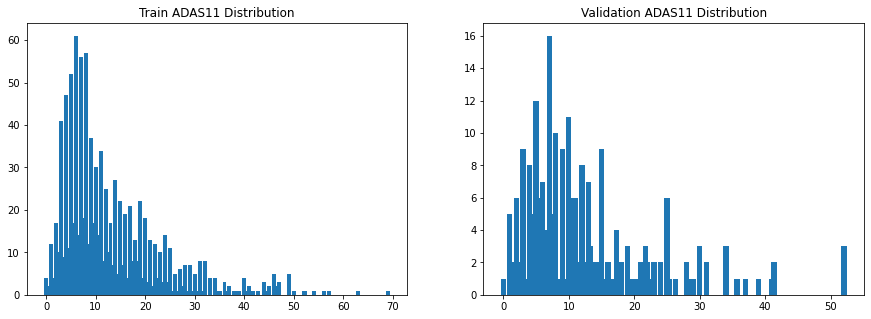

In [20]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[1].bar(pd.Series(y_adas_val).value_counts().keys(), pd.Series(y_adas_val).value_counts().values)
ax[1].set_title('Validation ADAS11 Distribution')
ax[0].bar(pd.Series(y_adas_train).value_counts().keys(), pd.Series(y_adas_train).value_counts().values)
ax[0].set_title('Train ADAS11 Distribution')
plt.show()

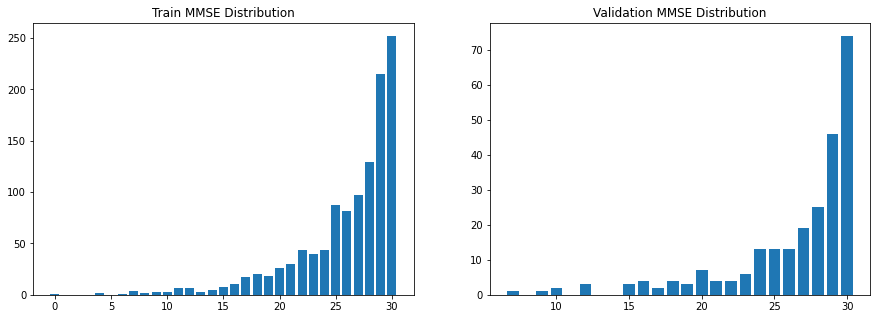

In [21]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[1].bar(pd.Series(y_mmse_val).value_counts().keys(), pd.Series(y_mmse_val).value_counts().values)
ax[1].set_title('Validation MMSE Distribution')
ax[0].bar(pd.Series(y_mmse_train).value_counts().keys(), pd.Series(y_mmse_train).value_counts().values)
ax[0].set_title('Train MMSE Distribution')
plt.show()